# Exploring and Cleaning the data 
This workbook is dedicated to exploring the data (using matplotlib) and cleaning the data. 

There are two main sections:

1) General cleaning operations, including: 
- renaming all the indices to 'date' 
- ensuring column headers are meaningful and unique (useful for merging later) 
- ensuring all the indices are indeed 'DatetimeIndex'
- ensuring no duplicates on the index 
- getting all the indices sorted by date
- handle any NaN values (there were none! yay!) 

2) Exploring the data with plots, and investigating outliers 
- plot all the data to identify outliers 
- understand why the outlier may exist
- remove the outlier if appropriate 

Cleaned data will be pickled and saved to `cleaned_data/` 

NOTE: I lost my Fitbit tracker on August 25,2020, and replaced it November 7, 2020.  
**Therefore, there is a gap in the data between 2020-08-24 and 2020-11-06.**

In [225]:
# The libraries used in this notebook. 
import pandas as pd
import matplotlib.pyplot as plt

#### Read all of the data in the `data/` directory. 
See `import_data.ipynb` for details on how the data was imported from Fitbit, and pickled into the `data/` directory. 

In [226]:
sleep_score_orig = pd.read_pickle('data/sleep_score.pkl')
sleep_detail_orig = pd.read_pickle('data/sleep_detail.pkl')

lightly_active_orig = pd.read_pickle('data/lightly_active.pkl')
moderately_active_orig = pd.read_pickle('data/moderately_active.pkl')
very_active_orig = pd.read_pickle('data/very_active.pkl')
sedentary_minutes_orig = pd.read_pickle('data/sedentary_minutes.pkl')

step_daily_orig = pd.read_pickle('data/step_daily.pkl')

bpm_orig = pd.read_pickle('data/bpm.pkl')
resting_heartrate_orig = pd.read_pickle('data/resting_heartrate.pkl')

In [227]:
# A list of all the dataframes 
dfs = [
    sleep_score_orig, 
    sleep_detail_orig, 
    lightly_active_orig,
    moderately_active_orig,
    very_active_orig,
    sedentary_minutes_orig,
    step_daily_orig,
    bpm_orig,
    resting_heartrate_orig,
]

## Quick cleaning of the indices 
1) Ensure all the indices are named 'date' (for ease of merging later)   
2) Sort all of the data by date   
3) Ensure all the indices are of DatetimeIndex format  
4) Ensure all the index values are unique  

In [228]:
# Nothing will print if all checks pass 
for df in dfs: 
    df.index.name = 'date'        # Rename all indices 'date'
    df.sort_index(inplace=True)   # Sort data by date 
    if not isinstance(df.index, pd.DatetimeIndex):  # Check that index is of type DatetimeIndex
        print (f'{df.head(1)} does not have DatetimeIndex')
    if not df.index.is_unique:    # Check that index values are unique 
        print(f'{df.head(1)} does not have unique index')

#### Check for any NaN values 

In [229]:
# Nothing should print if there are no null values 
for df in dfs: 
    if df.isnull().values.any():
        print(f'{df.head(1)} has NaN values')

Great! Everything is nice and consistent now. 

#### Next, give the data columns unique and meaningful names 
This will be particularly useful later when merging and plotting the data. 

In [230]:
# Many tables have column names that are not very meaningful. Let's fix that.  
sleep_score_orig.rename(columns={'overall_score':'overall_sleep_score'}, inplace=True)
lightly_active_orig.rename(columns={'value':'light_act_mins'}, inplace=True)
moderately_active_orig.rename(columns={'value':'moderate_act_mins'}, inplace=True)
very_active_orig.rename(columns={'value':'very_act_mins'}, inplace=True)
sedentary_minutes_orig.rename(columns={'value':'sedentary_mins'}, inplace=True)
step_daily_orig.rename(columns={'value':'daily_steps'}, inplace=True)
bpm_orig.rename(columns={'max':'bpm_max', 'mean':'bpm_mean'}, inplace=True)
resting_heartrate_orig.rename(columns={'value':'resting_hr', 'error':'rest_hr_error'}, inplace=True)

## Explore the data graphically 
Each dataframe will be plotted, and any outliers will be noted and handled.  
A preview of the final data will be at the bottom of each section. 

### sleep_score_orig

<AxesSubplot:xlabel='date'>

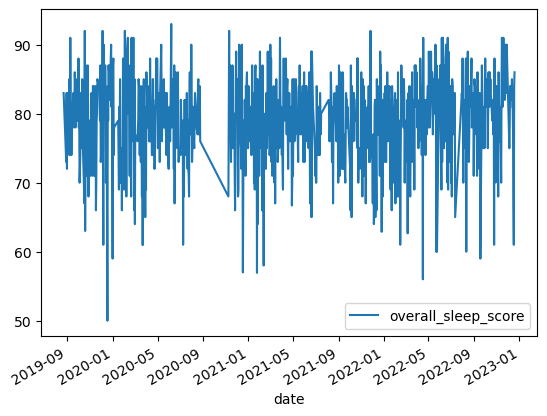

In [231]:
sleep_score_orig.plot(use_index=True, y='overall_sleep_score')

None of the values here are out of my expectation, so I will keep all the values. 

In [232]:
sleep_score_orig.to_pickle('cleaned_data/sleep_score.pkl')

### sleep_detail_orig

<AxesSubplot:xlabel='date'>

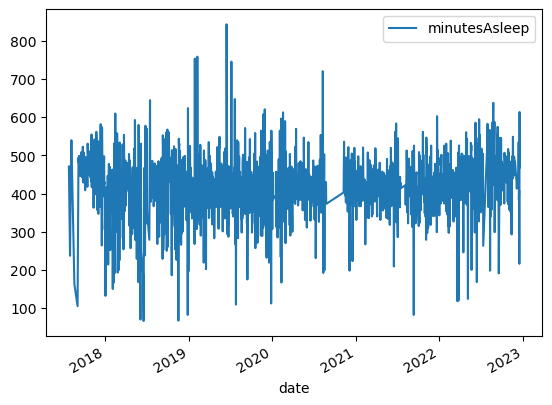

In [233]:
sleep_detail_orig.plot(use_index=True, y='minutesAsleep')

There are some unexpected values: A few days are reporting over 600mins(10hours) of sleep. Let's investigate those values. 

In [234]:
# There are 15 days with sleep values over 600 minutes
# Let's look at those days in more detail 
sleep_detail_orig[sleep_detail_orig['minutesAsleep'] > 600]

,minutesAsleep,mainSleep,deep_mins,wake_mins,light_mins,rem_mins
date,,,,,,
2018-02-13,610,1,103.0,106.0,416.0,91.0
2018-07-15,645,1,80.0,102.0,469.0,96.0
2018-12-28,624,1,142.0,81.0,312.0,170.0
2019-01-27,754,1,125.0,132.0,471.0,158.0
2019-02-07,759,1,67.0,93.0,398.0,157.0
2019-06-15,844,1,0.0,0.0,0.0,0.0
2019-07-06,746,1,109.0,77.0,281.0,53.0
2019-07-21,648,1,102.0,69.0,231.0,149.0
2019-11-23,608,1,0.0,0.0,0.0,0.0


For each day with a value over 600, **I will check my calendar and photos to see if there was an event that could explain a particularly long sleep.**  
If I could find a reason to explain a long sleep, I kept the observation.  
If I could not find a reason to explain a long sleep, I dropped the obvervation. 

Results below: 
- 2018-02-13 -- Keeping. Flew to Mexico, probably slept a lot. 
- 2018-07-15 -- Keeping. Flew to Portland, probably jet lagged. 
- 2018-12-28 -- Keeping. Yet another travel day; flew to Michigan for xmas.
- 2019-01-27 -- Keeping. Climbed Mt. St. Helens. I probably slept a long time after this. 
- **2019-02-07 -- Dropping. I cant think of a reason why I would sleep for 12 hours on a Thursday / worknight.**
- 2019-06-15 -- Keeping. Climbed Mt. Adams. It seems unlikely that I actually slept for 14 hours. But I wouldn't be surprised if I was in bed for that long. 
- **2019-07-06 -- Dropping. I was visiting my Mom. There is no way she would let me sleep in that long.**
- 2019-07-21 -- Keeping. Honestly... not sure about this one. But the data came in clean, so keeping. 
- 2019-11-23 -- Keeping. Night after cousin's wedding. I probably slept in. 
- 2019-11-29 -- Keeping. I was camping in freezing weather, so I probably slept a long time.
- 2020-02-17 -- Keeping. Flew back from Portugal. Was probably jetlagged. 
- 2020-08-09 -- Keeping. Was backpacking with sister and this was our rest day. I slept for a longgg time.
- 2021-12-22 -- Keeping. Night after friend's bday party. Probably slept in. 
- 2022-08-25 -- Keeping. Climbed Grand Teton. Definitely slept a lot after. 
- 2022-12-18 -- Keeping. Slept in after being jetlagged traveling home for xmas. 

I originally thought I was going to drop a lot of these rows, but after investigating, many of them seemed legitimate! 

In [235]:
# Drop the aforementioned rows from the data
sleep_detail_orig.drop(index=['2019-02-07', '2019-07-06'], inplace=True)

NOTE: There are many day where the **sleep level minutes** are zero. I will keep these, as sometimes the Fitbit tracker does not get detailed enough data to calculate sleep levels, but it is good enough to calculate minutes asleep. I am more intersted in minutes asleep. So I will keep all of these values. 

I am also going to drop any days where I slept less than 3 hours, as these are so out of my normal sleep range, I don't want to consider them. 

In [236]:
sleep_detail_orig = sleep_detail_orig[sleep_detail_orig['minutesAsleep'] > 180]

<AxesSubplot:xlabel='date'>

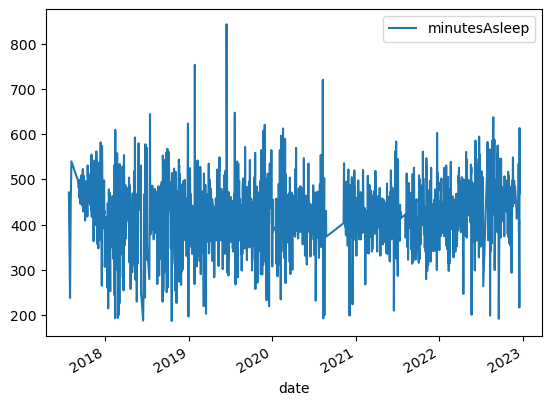

In [237]:
sleep_detail_orig.plot(use_index=True, y='minutesAsleep')

In [238]:
sleep_detail_orig.to_pickle('cleaned_data/sleep_detail.pkl')

### step_daily_orig

<AxesSubplot:xlabel='date'>

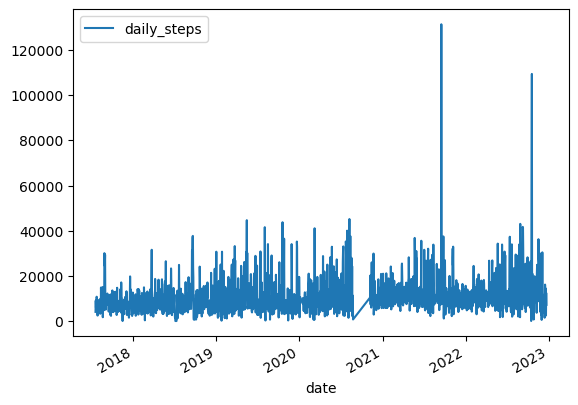

In [239]:
step_daily_orig.plot(use_index=True, y='daily_steps')

There are certainly some red-flag values here. I don't think there should be any days above 50,000 steps, so let's filter for that. 

In [240]:
step_daily_orig = step_daily_orig[step_daily_orig['daily_steps'] < 50000]

<AxesSubplot:xlabel='date'>

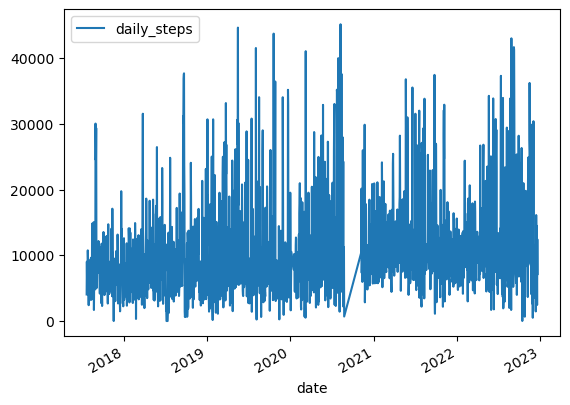

In [241]:
step_daily_orig.plot(use_index=True, y='daily_steps')

That looks good! That is all the cleaning I will do here. 

In [242]:
step_daily_orig.to_pickle('cleaned_data/step_daily')

## bpm_orig

<AxesSubplot:xlabel='date'>

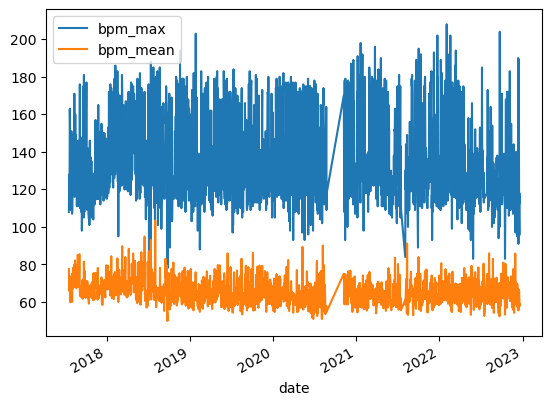

In [243]:
bpm_orig.plot()

  The `bpm_mean` data has a few suspicious values. I'll investigate any days where my `bpm_mean` was over 90bpm. 


In [244]:
bpm_orig[bpm_orig['bpm_mean'] > 90]

,bpm_max,bpm_mean
date,,
2018-06-16,172,94.887589
2018-06-17,131,94.462503
2018-07-14,188,93.074160
2018-08-02,177,103.397634
2020-08-07,134,90.028337
2021-08-12,149,91.154486


- **2018-06-16 -- Dropping. No evidence to support higher bpm.**	
- **2018-06-17 -- Dropping. No evidence to support higher bpm.**
- **2018-07-14 -- Dropping. No evidence to support higher bpm.**
- **2018-08-02 -- Dropping. No evidence to support higher bpm.**
- 2020-08-07 -- Keeping. Long day of backpacking at elevation. I expect heartrate to be high. 
- 2021-08-12 -- Keeping. Long day of backpacking at elevation. I expect heartrate to be high. 

In [245]:
bpm_orig.drop(index=['2018-06-16', '2018-06-17', '2018-07-14', '2018-08-02'], inplace=True)

Let's also look at days where the max_bpm didn't get over 90. That is suspiciously low. 

In [246]:
bpm_orig[bpm_orig['bpm_max'] < 90]

,bpm_max,bpm_mean
date,,
2018-07-06,70,70.000000
2018-07-07,70,70.000000
2018-07-08,70,70.000000
2018-07-09,76,71.500000
2018-07-10,70,70.000000
2018-07-13,87,65.092354
2018-09-25,78,49.855591
2018-10-05,89,56.014758
2019-02-14,88,54.746993


Right away we can see there are many days where the `bpm_max` and `bpm_mean` are both 70. This indicates to me a faulty reading. Let's drop all of those values. 

In [247]:
bpm_orig.drop(index=['2018-07-06', '2018-07-07', '2018-07-08', '2018-07-10'], inplace=True)

<AxesSubplot:xlabel='date'>

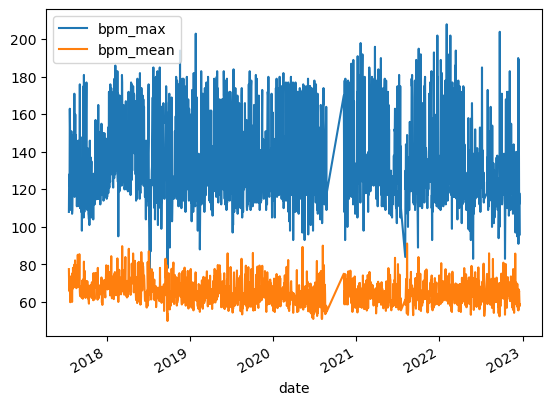

In [248]:
bpm_orig.plot()

Looking good! 

In [249]:
bpm_orig.to_pickle('cleaned_data/bpm.pkl')

## resting_heartrate_orig

<AxesSubplot:xlabel='date'>

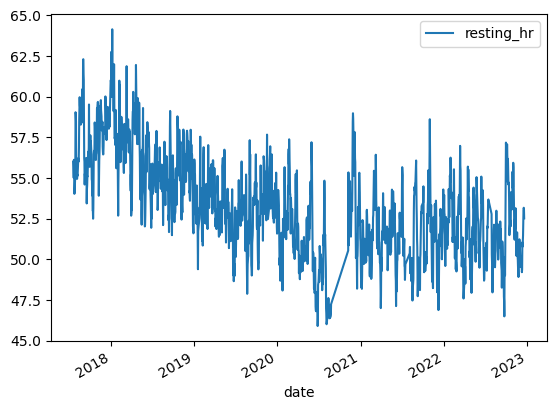

In [250]:
resting_heartrate_orig.plot(use_index=True, y='resting_hr')

Everything here looks okay to me. 

In [251]:
resting_heartrate_orig.to_pickle('cleaned_data/resting_heartrate.pkl')